# Analysing the risk of tropical cyclones in Vietnam
All the parameters are defined in the file Configuration.py.

Please change the path to the project folder according to your computer in Configuration.py.

This Jupyter Notebook stores the results of wind damages on houses, while the codes for analysing other hazard-asset combinations are also given. Please feel free to explore.

In [1]:
import numpy as np
from matplotlib import colors
from Configuration import *
import os

# Construct exposure
## Houses

In [2]:
from climada.entity import LitPop

fl_EXP_houses = os.path.join(project_folder, 'EXP_houses_' + country + file_identifier + '.hdf5')

EXP_houses = LitPop()

if os.path.isfile(fl_EXP_houses):

    EXP_houses.read_hdf5(fl_EXP_houses)

else:
    EXP_houses.set_country(countries=country, res_arcsec=30, reference_year=2020, fin_mode='norm')
    EXP_houses['value'] = EXP_houses['value'] * house_assets # house_assets is a parameter defined in Configuration.py
    EXP_houses['if_TC'] = np.ones(len(EXP_houses['value'])).astype(int)
    EXP_houses['if_TS'] = np.ones(len(EXP_houses['value'])).astype(int)

    EXP_houses.set_geometry_points()

    # Function define_region_id marks the areas of interest (Mekong delta is given 1; Red River delta 2)
    
    from Functions import define_region_id

    EXP_houses['region_id'] = define_region_id(EXP_houses)

    EXP_houses.value_unit = '$'

    EXP_houses.write_hdf5(fl_EXP_houses)

2020-11-23 19:49:10,033 - climada - DEBUG - Loading default config file: /Users/qinhan/Documents/climada_python-1.3.0/climada/conf/defaults.conf
2020-11-23 19:49:13,121 - climada.entity.exposures.base - INFO - Reading /Users/qinhan/Documents/AXA/ECA_Vietnam/Model_output/EXP_houses_VNM_v01.hdf5


### An example of plotting assets, which could be replicated for other assets

/Users/qinhan/Documents/climada_python-1.3.0/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


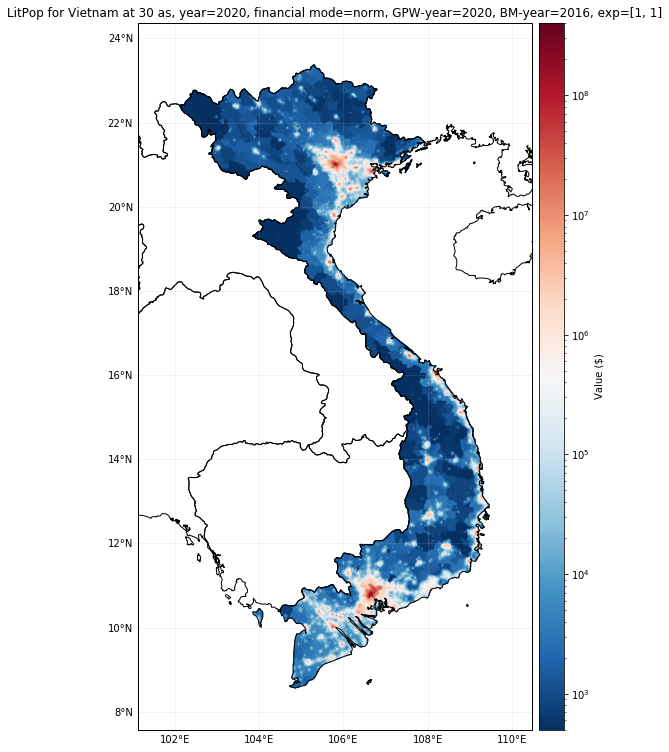

In [3]:
norm = colors.LogNorm(vmin=500, vmax=4.0e8)

EXP_houses.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

## Agriculture

In [ ]:
from climada.entity import Exposures

fl_EXP_agri = os.path.join(project_folder, 'EXP_agri_id_' + country + file_identifier + '.hdf5')

EXP_agri = Exposures()

if os.path.isfile(fl_EXP_agri):

    EXP_agri.read_hdf5(fl_EXP_agri)

else:
    
    import geopandas as gpd
    from climada.util.constants import agri_exp_path

    agri_exp = gpd.read_file(agri_exp_path)

    agri_exp.rename(columns={'grid_code':'value'},inplace=True)

    EXP_agri = Exposures(agri_exp)

    EXP_agri.ref_year = 2020

    EXP_agri.set_lat_lon()

    EXP_agri.check()

    EXP_agri['value'] = EXP_agri['value'] * 1000000 # The value stored in the shapefile has the unit of Million dollars

    EXP_agri['if_TC'] = np.ones(len(EXP_agri['value'])).astype(int)

    EXP_agri['if_TS'] = np.ones(len(EXP_agri['value'])).astype(int)

    from Functions import define_region_id

    EXP_agri['region_id'] = define_region_id(EXP_agri)

    EXP_agri.value_unit = '$'
    
    EXP_agri.write_hdf5(fl_EXP_agri)

## People

In [ ]:
from climada.entity import LitPop

fl_EXP_people = os.path.join(project_folder, 'EXP_people_id_' + country + file_identifier + '.hdf5')

EXP_people = LitPop()

if os.path.isfile(fl_EXP_people):

    EXP_people.read_hdf5(fl_EXP_people)

else:
    EXP_people.set_country(countries=country, res_arcsec=30, reference_year=2020, fin_mode='norm', exponents=[0, 1])
    EXP_people['value'] = EXP_people['value'] * population
    EXP_people['if_TC'] = np.ones(len(EXP_people['value'])).astype(int)
    EXP_people['if_TS'] = np.ones(len(EXP_people['value'])).astype(int)

    EXP_people.set_geometry_points()

    from Functions import define_region_id
    
    EXP_people['region_id'] = define_region_id(EXP_people)

    EXP_people.value_unit = ''

    EXP_people.write_hdf5(fl_EXP_people)

# Simulate hazards

### IMPORTANT NOTE: Loading all the files for wind and surge hazards (current climate, RCP4.5, RCP8.5) might bust the memory as the total size of all these files could exceed 8 GB. It is suggested analysing wind and surge separately.

## Define paths and file names

In [4]:
# Wind
fl_HAZ_tc = fl_HAZ_tc_cc0 # This path is defined in Configuration.py, indicating the wind hazard under current climate scenario

fl_HAZ_tc_45 = os.path.join(project_folder, 'HAZ_tc_cc45_mix50_wof_' + country + file_identifier + '.hdf5')

fl_HAZ_tc_85 = os.path.join(project_folder, 'HAZ_tc_cc85_mix50_wof_' + country + file_identifier + '.hdf5')


# Surge
fl_HAZ_ts = os.path.join(project_folder, 'HAZ_ts_mix50_CDEM_' + country + file_identifier + '.hdf5')

fl_HAZ_ts_45 = os.path.join(project_folder, 'HAZ_ts_cc45_mix50_CDEM_' + country + file_identifier + '.hdf5')

fl_HAZ_ts_85 = os.path.join(project_folder, 'HAZ_ts_cc85_mix50_CDEM_' + country + file_identifier + '.hdf5')


## Wind of tropical cyclones

In [5]:

from Functions import intro_haz_tc

HAZ_tc = intro_haz_tc(fl_HAZ_tc, cc=0)

HAZ_tc_cc45 = intro_haz_tc(fl_HAZ_tc_45, cc=45)

HAZ_tc_cc85 = intro_haz_tc(fl_HAZ_tc_85, cc=85)

2020-11-23 19:50:55,334 - climada.hazard.base - INFO - Reading /Users/qinhan/Documents/AXA/ECA_Vietnam/Model_output/HAZ_tc_mix50_VNM_v01.hdf5
2020-11-23 19:50:57,172 - climada.hazard.base - INFO - Reading /Users/qinhan/Documents/AXA/ECA_Vietnam/Model_output/HAZ_tc_cc45_mix50_wof_VNM_v01.hdf5
2020-11-23 19:50:58,911 - climada.hazard.base - INFO - Reading /Users/qinhan/Documents/AXA/ECA_Vietnam/Model_output/HAZ_tc_cc85_mix50_wof_VNM_v01.hdf5


### An example of plotting hazards at given return period.
### NOTE: this plotting function could take hours

In [ ]:
HAZ_tc.plot_rp_intensity(return_period = [10,25,50,100])

## Surge of tropical cyclones

In [ ]:
from Functions import intro_haz_ts

HAZ_ts = intro_haz_ts(fl_HAZ_ts, fl_HAZ_tc, cc = 0)

HAZ_ts_cc45 = intro_haz_ts(fl_HAZ_ts_45, fl_HAZ_tc_45, cc = 45)

HAZ_ts_cc85 = intro_haz_ts(fl_HAZ_ts_85, fl_HAZ_tc_85, cc = 85)

# Create impact functions

## Wind impact functions

In [6]:
from climada.entity import IFTropCyclone, ImpactFuncSet, ImpactFunc

In [7]:
# Impact function wind-houses

IFs_TC_houses = ImpactFuncSet()

if_tc = IFTropCyclone()
if_tc.haz_type = 'TC'
if_tc.id = 1
if_tc.intensity_unit = 'm/s'
if_tc.intensity = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
if_tc.mdd = np.array([0, 0, 0, 0, 0.05, 0.20, 0.45, 0.65, 0.78])
if_tc.paa = np.ones(9)
if_tc.check()

IFs_TC_houses.append(if_tc)


# Impact function wind-agriculture

IFs_TC_agri = ImpactFuncSet()

if_tc_agri = IFTropCyclone()
if_tc_agri.haz_type = 'TC'
if_tc_agri.id = 1

V_HALF = 56.7 # vary value of v_half here

if_tc_agri.set_emanuel_usa(v_thresh=25.7, v_half=V_HALF, scale=1)

IFs_TC_agri.append(if_tc_agri)


# Impact function wind-people

IFs_TC_people = ImpactFuncSet()

if_tc_people = IFTropCyclone()
if_tc_people.haz_type = 'TC'
if_tc_people.id = 1
if_tc_people.intensity_unit = 'm/s'

if_tc_people.intensity = np.arange(0, 100, 0.5)
if_tc_people.paa = np.ones(if_tc_people.intensity.size)
if_tc_people.mdd = np.zeros(if_tc_people.intensity.size)
for idx in range(if_tc_people.mdd.size):
    if if_tc_people.intensity[idx] >= storm_threshold:
        if_tc_people.mdd[idx] = 1

if_tc_people.check()

IFs_TC_people.append(if_tc_people)

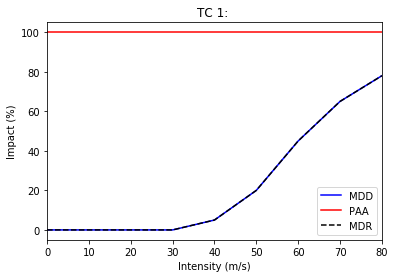

In [8]:
IFs_TC_houses.plot()

## Surge impact functions

In [ ]:
# Impact function surge-houses

IFs_TS_houses = ImpactFuncSet()

if_ts = ImpactFunc()
if_ts.id = 1
if_ts.haz_type = 'TS'
if_ts.intensity_unit = 'm'
if_ts.intensity = np.array([0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0])
if_ts.mdd = np.array([0, 0.33, 0.49, 0.62, 0.72, 0.87, 0.93, 0.98, 1.0])
if_ts.paa = np.ones(9)
if_ts.check()

IFs_TS_houses.append(if_ts)


# Impact function surge-agriculture

IFs_TS_agri = ImpactFuncSet()

if_ts_agri = ImpactFunc()
if_ts_agri.id = 1
if_ts_agri.haz_type = 'TS'
if_ts_agri.intensity_unit = 'm'
if_ts_agri.intensity = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
if_ts_agri.mdd = np.array([0,0.01,0.02,0.12,0.43,0.73,0.89,0.95,0.98,1.0])
if_ts_agri.paa = np.ones(10)
if_ts_agri.check()

IFs_TS_agri.append(if_ts_agri)



## Impact function surge-people

IFs_TS_people = ImpactFuncSet()

if_ts_people = ImpactFunc()
if_ts_people.haz_type = 'TS'
if_ts_people.id = 1
if_ts_people.intensity_unit = 'm'

if_ts_people.intensity = np.arange(0, 10, 0.05)
if_ts_people.paa = np.ones(if_ts_people.intensity.size)
if_ts_people.mdd = np.zeros(if_ts_people.intensity.size)
for idx in range(if_ts_people.mdd.size):
    if if_ts_people.intensity[idx] >= surge_threshold:
        if_ts_people.mdd[idx] = 1

if_ts_people.check()

IFs_TS_people.append(if_ts_people)

# Calculate impacts

In [9]:
from climada.engine import Impact

In [10]:
# Wind-houses
IMP_houses_TC = Impact()
IMP_houses_TC.calc(EXP_houses, IFs_TC_houses, HAZ_tc)

IMP_houses_TC_45 = Impact()
IMP_houses_TC_45.calc(EXP_houses, IFs_TC_houses, HAZ_tc_cc45)

IMP_houses_TC_85 = Impact()
IMP_houses_TC_85.calc(EXP_houses, IFs_TC_houses, HAZ_tc_cc85)

2020-11-23 19:52:43,820 - climada.entity.exposures.base - INFO - Matching 402408 exposures with 102557 centroids.
2020-11-23 19:53:13,979 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:53:42,515 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:53:42,553 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:54:12,341 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:54:12,400 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.


### An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

/Users/qinhan/Documents/climada_python-1.3.0/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Expected average annual impact (houses TC): 3.447e+08 USD
Damage with 100-year return period: 6.304e+09 USD


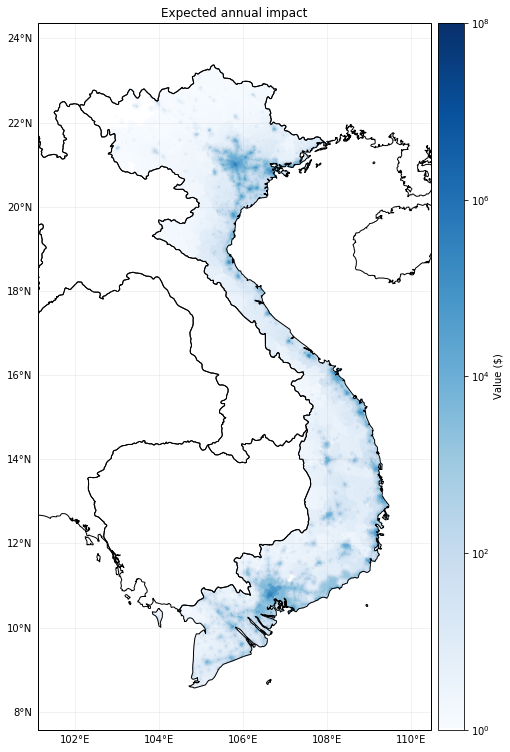

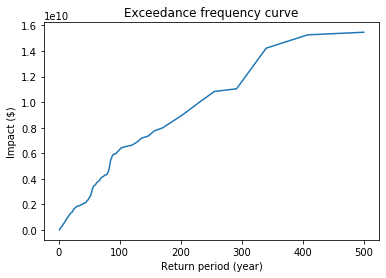

In [11]:
norm = colors.LogNorm(vmin=1, vmax=1.0e8)
IMP_houses_TC.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap=cmap, buffer=1, ignore_zero=False)
freq_curve_houses_TC = IMP_houses_TC.calc_freq_curve(np.linspace(1, 500, 500))  # impact exceedence frequency curve
freq_curve_houses_TC.plot()
print('Expected average annual impact (houses TC): {:.3e} USD'.format(IMP_houses_TC.aai_agg))
print('Damage with 100-year return period: {:.3e} USD'.format(IMP_houses_TC.calc_freq_curve(100).impact))

In [ ]:
## Calculate impact
# Wind-agriculture

IMP_agri_TC = Impact()
IMP_agri_TC.calc(EXP_agri, IFs_TC_agri, HAZ_tc)

IMP_agri_TC_45 = Impact()
IMP_agri_TC_45.calc(EXP_agri, IFs_TC_agri, HAZ_tc_cc45)

IMP_agri_TC_85 = Impact()
IMP_agri_TC_85.calc(EXP_agri, IFs_TC_agri, HAZ_tc_cc85)

In [ ]:
## Calculate impact
# Wind-people

IMP_people_TC = Impact()
IMP_people_TC.calc(EXP_people, IFs_TC_people, HAZ_tc)

IMP_people_TC_45 = Impact()
IMP_people_TC_45.calc(EXP_people, IFs_TC_people, HAZ_tc_cc45)

IMP_people_TC_85 = Impact()
IMP_people_TC_85.calc(EXP_people, IFs_TC_people, HAZ_tc_cc85)

In [ ]:
## Calculate impact
# Surge-houses

IMP_houses_TS = Impact()
IMP_houses_TS.calc(EXP_houses, IFs_TS_houses, HAZ_ts)

IMP_houses_TS_45 = Impact()
IMP_houses_TS_45.calc(EXP_houses, IFs_TS_houses, HAZ_ts_cc45)

IMP_houses_TS_85 = Impact()
IMP_houses_TS_85.calc(EXP_houses, IFs_TS_houses, HAZ_ts_cc85)

In [ ]:
## Calculate impact
# Surge-agriculture

IMP_agri_TS = Impact()
IMP_agri_TS.calc(EXP_agri, IFs_TS_agri, HAZ_ts)

IMP_agri_TS_45 = Impact()
IMP_agri_TS_45.calc(EXP_agri, IFs_TS_agri, HAZ_ts_cc45)

IMP_agri_TS_85 = Impact()
IMP_agri_TS_85.calc(EXP_agri, IFs_TS_agri, HAZ_ts_cc85)

In [ ]:
## Calculate impact
# Surge-people

IMP_people_TS = Impact()
IMP_people_TS.calc(EXP_people, IFs_TS_people, HAZ_ts)

IMP_people_TS_45 = Impact()
IMP_people_TS_45.calc(EXP_people, IFs_TS_people, HAZ_ts_cc45)

IMP_people_TS_85 = Impact()
IMP_people_TS_85.calc(EXP_people, IFs_TS_people, HAZ_ts_cc85)

# Define adaptation measures

In [12]:
from climada.entity import Measure
from climada.entity import MeasureSet

## Measures for wind

In [13]:
TC_meas1 = Measure()
TC_meas1.name = 'Mangrove'
TC_meas1.haz_type = 'TC'
TC_meas1.color_rgb = np.array([0.16, 0.62, 0.56])
mangrove_maintain = 4000000
TC_meas1.cost = 172*1000000*0.000043*1160*1000*150/10000 + mangrove_maintain * 30
TC_meas1.mdd_impact = (1, 0)
TC_meas1.paa_impact = (1, 0)
TC_meas1.hazard_inten_imp = (1, -4) # reduces intensity by 4


TC_meas_set = MeasureSet()
TC_meas_set.append(TC_meas1)
TC_meas_set.check()

## Measures for surge

In [ ]:
TS_meas1 = Measure()
TS_meas1.name = 'Mangrove'
TS_meas1.haz_type = 'TS'
TS_meas1.exp_region_id = [1, 2]
TS_meas1.color_rgb = np.array([0.16, 0.62, 0.56])
mangrove_maintain = 4000000
TS_meas1.cost = 172 * 1000000 * 0.000043 * 1160 * 1000 * 150 / 10000 + mangrove_maintain * 30  # 361,664,400$
TS_meas1.mdd_impact = (1, 0)
TS_meas1.paa_impact = (1, 0)
TS_meas1.hazard_inten_imp = (1, -0.5)

TS_meas2 = Measure()
TS_meas2.name = 'Seadykes'
TS_meas2.haz_type = 'TS'
TS_meas2.color_rgb = np.array([0.91, 0.77, 0.42])
TS_meas2.exp_region_id = [1]
seadyke_maintain = 200
TS_meas2.cost = (110 * 1000000 * 0.000043 + seadyke_maintain * 30) * 150 * 1000
TS_meas2.hazard_inten_imp = (1, -2)  

TS_meas3 = Measure()
TS_meas3.name = 'Gabions'
TS_meas3.haz_type = 'TS'
TS_meas3.color_rgb = np.array([0.65, 0.65, 0.55])
TS_meas3.exp_region_id = [1]
gabion_maintain = 130
TS_meas3.cost = (1300 + gabion_maintain) * 150 * 1000
TS_meas2.cost = (110 * 1000000 * 0.000043 + 0.7 * seadyke_maintain * 30) * 150 * 1000  # protect against event once every 20 years
TS_meas3.hazard_inten_imp = (1, -0.5)

TS_meas_set = MeasureSet()
TS_meas_set.append(TS_meas1)
TS_meas_set.append(TS_meas2)
TS_meas_set.append(TS_meas3)
TS_meas_set.check()

# Predict future risks, considering economic growth

In [14]:
from climada.entity import Entity
from climada.entity import DiscRates
import copy

## Construct discount rates

In [15]:
# discount rate for future values
disc = DiscRates()
disc.years = np.arange(2000, 2100)
disc.rates = np.ones(disc.years.size) * disc_rate

# number of people does not discount
people_disc = DiscRates()
people_disc.years = np.arange(2000, 2100)
people_disc.rates = np.zeros(people_disc.years.size)

## Generate Entity
**Entity**: socio-economic models needed for analysing cost-benefit, must including

   - Exposures: exposed values
      
   - ImpactFuncSet: collection of impact functions per hazard

   - DiscRates: discount rates per year
   
   - MeasureSet: collection of measures for adaptation

### NOTE: Only wind is considered here. When analysing surge, please edit the corresponding impact function set and measure set

In [16]:
# Current houses entity
ENT_houses = Entity()

ENT_houses.exposures = EXP_houses

ENT_houses.impact_funcs = IFs_TC_houses # When analysing surge, change IFs_TC_houses to IFs_TS_houses or other variable names defined for impact function set

ENT_houses.measures = TC_meas_set # When analysing surge, change IFs_TC_houses to IFs_TS_houses or other variable names defined for impact function set

ENT_houses.disc_rates = disc

ENT_houses.check()

# Future houses entity

EXP_houses_future = copy.deepcopy(EXP_houses)

EXP_houses_future['value'] *= houses_asset_growth # houses_asset_growth is parameter defined in Configuration.py

ENT_houses_future = copy.deepcopy(ENT_houses)

ENT_houses_future.exposures = EXP_houses_future

ENT_houses_future.exposures.ref_year = horizon

ENT_houses_future.check()

2020-11-23 19:56:38,824 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-11-23 19:56:38,825 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-23 19:56:38,826 - climada.entity.exposures.base - INFO - cover not set.
2020-11-23 19:56:38,827 - climada.entity.exposures.base - INFO - category_id not set.
2020-11-23 19:56:38,962 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-11-23 19:56:38,963 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-23 19:56:38,964 - climada.entity.exposures.base - INFO - cover not set.
2020-11-23 19:56:38,965 - climada.entity.exposures.base - INFO - category_id not set.


## Agriculture

In [ ]:
# Current agriculture entity

ENT_agri = Entity()

ENT_agri.exposures = EXP_agri

ENT_agri.impact_funcs = IFs_TC_agri # When analysing surge, change IFs_TC_agri to IFs_TS_agri or other variable names defined for impact function set

ENT_agri.measures = TC_meas_set # When analysing surge, change TC_meas_set to TS_meas_set or other variable names for measure set

ENT_agri.disc_rates = disc

ENT_agri.check()

# Future agriculture entity

EXP_agri_future = copy.deepcopy(EXP_agri)

EXP_agri_future ['value'] *= agri_asset_growth # houses_asset_growth is parameter defined in Configuration.py

ENT_agri_future = copy.deepcopy(ENT_agri)

ENT_agri_future.exposures = EXP_agri_future

ENT_agri_future.exposures.ref_year = horizon

ENT_agri_future.check()

print('agri entity built')

## People

In [ ]:
# Current people entity

ENT_people = Entity()

ENT_people.exposures = EXP_people

ENT_people.impact_funcs = IFs_TC_people

ENT_people.measures = TC_meas_set

ENT_people.disc_rates = people_disc

ENT_people.check()

# Future people entity

EXP_people_future = copy.deepcopy(EXP_people)

EXP_people_future ['value'] *= population_growth

ENT_people_future = copy.deepcopy(ENT_people)

ENT_people_future.exposures = EXP_people_future

ENT_people_future.exposures.ref_year = horizon

ENT_people_future.check()

# Calculating cost-benefit of adaptation measures, given Climate Change (RCP 8.5) and Economic Growth, taking TC-houses as an example
1. The average annual loss of each year from 2020 to 2050 is discounted to the currect value;
2. The value of assets/exposure is assumed to grow linearly until reaching the ultimate value defined by the user. (In the Configuration.py file, the value of houses in 2050 doubles compared to 2020)

In [17]:
from climada.engine import CostBenefit

In [18]:
# Wind-houses

cost_ben_houses_TC = CostBenefit()

cost_ben_houses_TC.calc(HAZ_tc, ENT_houses, HAZ_tc_cc85, ENT_houses_future, future_year=horizon)

2020-11-23 19:56:49,673 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:56:49,682 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:57:18,509 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:57:18,541 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:57:39,378 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:57:39,407 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:58:07,065 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:58:07,091 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:58:29,158 - climada.engine.cost_benefit - INFO - Computing cost benefit from years 2020 to 2050.

Meas

In [ ]:
# Wind-agriculture

cost_ben_agri_TC = CostBenefit()

cost_ben_agri_TC.calc(HAZ_tc, ENT_agri, HAZ_tc_cc85, ENT_agri_future, future_year=horizon)

# people is not considered here because the cost if measured in Value but people is counted by Number

## Plot cost-benefit of adaptation measures

2020-11-23 19:59:06,410 - climada.engine.cost_benefit - INFO - Current total risk at 2050: 5.090e+09
2020-11-23 19:59:06,411 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 19:59:06,420 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 19:59:31,046 - climada.engine.cost_benefit - INFO - Total risk with development at 2050: 6.884e+09
2020-11-23 19:59:31,054 - climada.engine.cost_benefit - INFO - Total risk with development and climate change at 2050: 8.676e+09


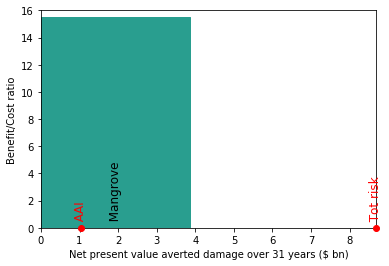

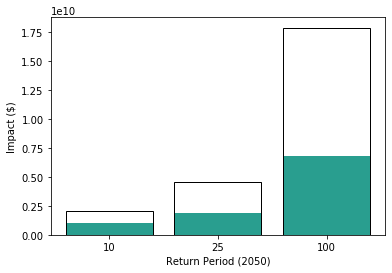

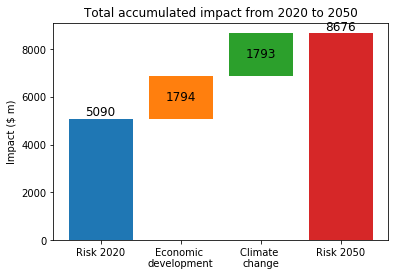

In [19]:
cost_ben_houses_TC.plot_cost_benefit()

cost_ben_houses_TC.plot_event_view()

cost_ben_houses_TC.plot_waterfall_accumulated(HAZ_tc, ENT_houses, ENT_houses_future, plot_arrow=False)


## Illustrate the damage reduction effect of adaptation measures under different climate scenarios (considering economic growth)

2020-11-23 20:01:27,241 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 20:01:27,261 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 20:01:56,990 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 20:01:57,027 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 20:02:31,802 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 20:02:31,840 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
2020-11-23 20:02:55,724 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 20:02:55,735 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.


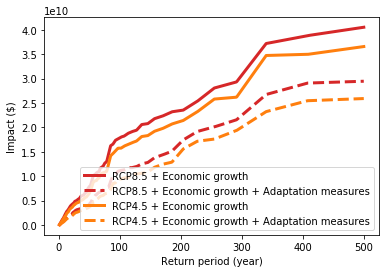

In [20]:
TC_meas_comb = Measure()
TC_meas_comb.name = 'Combined'
TC_meas_comb.haz_type = 'TC'
TC_meas_comb.color_rgb = np.array([1, 1, 1])
TC_meas_comb.cost = 1 # Cost is not relevant in the calculation but needed to define a measure. Therefore a random value is assigned.
TC_meas_comb.hazard_inten_imp = (1, -4) 
# NOTE: when creating a combined measure for surge adaptation, change -4 to -3.


IMP_houses_TC_eg_85 = Impact() # eg stands for economic growth
IMP_houses_TC_eg_85.calc(EXP_houses_future, IFs_TC_houses, HAZ_tc_cc85)
freq_curve_house_tc_500_eg_85 = IMP_houses_TC_eg_85.calc_freq_curve(np.linspace(1, 500, 500))
tc_imp_500_eg_85 = freq_curve_house_tc_500_eg_85.impact

IMP_houses_TC_eg_45 = Impact()
IMP_houses_TC_eg_45.calc(EXP_houses_future, IFs_TC_houses, HAZ_tc_cc45)
freq_curve_house_tc_500_eg_45 = IMP_houses_TC_eg_45.calc_freq_curve(np.linspace(1, 500, 500))
tc_imp_500_eg_45 = freq_curve_house_tc_500_eg_45.impact

IMP_houses_TC_eg_85_meas = TC_meas_comb.calc_impact(EXP_houses_future, IFs_TC_houses, HAZ_tc_cc85) # meas stands for measures
freq_curve_houses_tc_500_eg_85_meas = IMP_houses_TC_eg_85_meas[0].calc_freq_curve(np.linspace(1, 500, 500))
tc_imp_500_eg_85_meas = freq_curve_houses_tc_500_eg_85_meas.impact

IMP_houses_TC_eg_45_meas = TC_meas_comb.calc_impact(EXP_houses_future, IFs_TC_houses, HAZ_tc_cc45)
freq_curve_houses_tc_500_eg_45_meas = IMP_houses_TC_eg_45_meas[0].calc_freq_curve(np.linspace(1, 500, 500))
tc_imp_500_eg_45_meas = freq_curve_houses_tc_500_eg_45_meas.impact


rp = freq_curve_house_tc_500_eg_85.return_per

plt.plot(rp, tc_imp_500_eg_85, label='RCP8.5 + Economic growth', color='tab:red', linewidth=3.0)
plt.plot(rp, tc_imp_500_eg_85_meas, label='RCP8.5 + Economic growth + Adaptation measures', color='tab:red', linewidth=3.0, linestyle='--')
plt.plot(rp, tc_imp_500_eg_45, label='RCP4.5 + Economic growth', color='tab:orange', linewidth=3.0)
plt.plot(rp, tc_imp_500_eg_45_meas, label='RCP4.5 + Economic growth + Adaptation measures', color='tab:orange', linewidth=3.0, linestyle='--')

plt.legend()
# plt.yscale('log')
plt.xlabel('Return period (year)')
plt.ylabel('Impact ($)')
plt.title('')
fig = plt.gcf()


## Introduce insurance measures to reduce the residual risk (the damage after implementing the adaptation measures)

In [21]:
TC_meas_comb_ins = Measure()
TC_meas_comb_ins.name = 'Insurance'
TC_meas_comb_ins.haz_type = 'TC'
TC_meas_comb_ins.color_rgb = np.array([0.92, 0.22, 0.20])
TC_meas_comb_ins.risk_transf_attach = IMP_houses_TC_eg_85_meas[0].calc_freq_curve(10).impact 
# insurance is triggerd when the damage is larger than that with a return period of 10 years

TC_meas_comb_ins.hazard_inten_imp = (1, -4)
# NOTE: when creating a combined measure for surge adaptation, change -4 to -3.

TC_meas_comb_ins.risk_transf_cover = IMP_houses_TC_eg_85_meas[0].calc_freq_curve(100).impact
# insurance exhausts when the damage is larger than that with a return period of 100 years

TC_meas_comb_ins.cost = insu_cost_TC_houses * TC_meas_comb_ins.risk_transf_cover

IMP_houses_TC_eg_85_meas_ins, risk_transfer = TC_meas_comb_ins.calc_impact(EXP_houses_future, IFs_TC_houses,
                                                                           HAZ_tc_cc85)

print('total risk {:.3}'.format(IMP_houses_TC_eg_85_meas[0].aai_agg))
print('risk_transferred {:.3}'.format(risk_transfer.aai_agg))
print('final impact taken by the country {:.3}'.format(IMP_houses_TC_eg_85_meas_ins.aai_agg))


2020-11-23 20:06:30,267 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2020-11-23 20:06:30,295 - climada.engine.impact - INFO - Calculating damage for 401234 assets (>0) and 13719 events.
total risk 5.84e+08
risk_transferred 2.51e+08
final impact taken by the country 3.33e+08


# Plesae feel free to replicate the codes to analyse the cost-benefit of adaptation measures when addressing surge

In [ ]:
# Surge-houses

cost_ben_houses_TS = CostBenefit()

cost_ben_houses_TS.calc(HAZ_ts, ENT_houses, HAZ_ts_cc85, ENT_houses_future, future_year=horizon)

# Surge-agriculture

cost_ben_agri_TS = CostBenefit()

cost_ben_agri_TS.calc(HAZ_ts, ENT_agri, HAZ_ts_cc85, ENT_agri_future, future_year=horizon)

# people is not considered here because the cost if measured in Value but people is counted by Number